In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
#Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
### glimpse of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
### look for missing values, if there is any they should be handled.
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
## sum na counts if there is any 
df.isna().sum().sum()

0

In [7]:
## there is no missing values. lets look at how many churn and not churn counts we have on this data set.
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

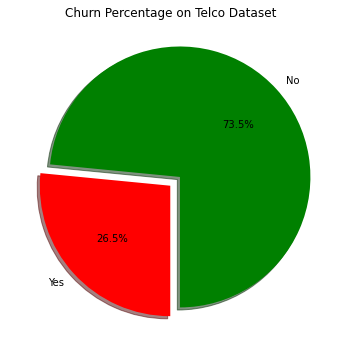

In [8]:
### churn percentage on telco dataset.
from pylab import rcParams
labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)
 
rcParams['figure.figsize'] = 6,6

# Plot
plt.pie(sizes, explode=(0.1,0), labels=labels, colors=["green","red"],
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Churn Percentage on Telco Dataset')
plt.show()

In [9]:
#### lok if the data includes categorical features.
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
### at first define categorical features that have 2 different unique values and can be classified in two categatories.
columns = df.columns
binary_features = []
for col in columns:
    if df.nunique()[col] == 2:
        binary_features.append(col)
binary_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [11]:
### define features that have more than 2 different values
columns = df.columns
multiple_features = []
for col in columns:
    if df.nunique()[col] != 2:
        multiple_features.append(col)
multiple_features

['customerID',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.so

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

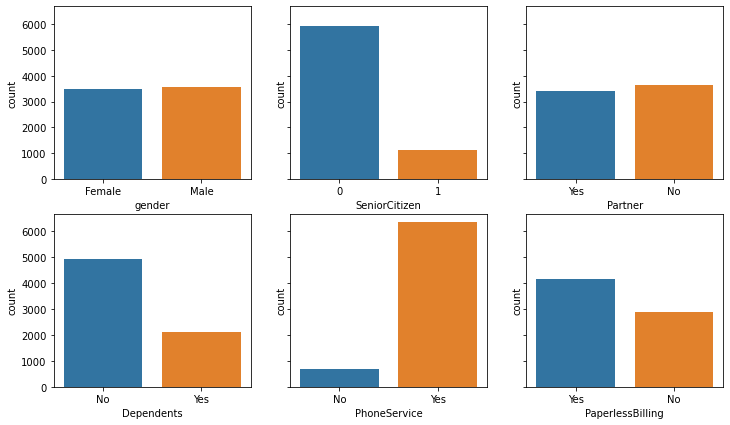

In [12]:
### Let’s check the class distribution of binary features.
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

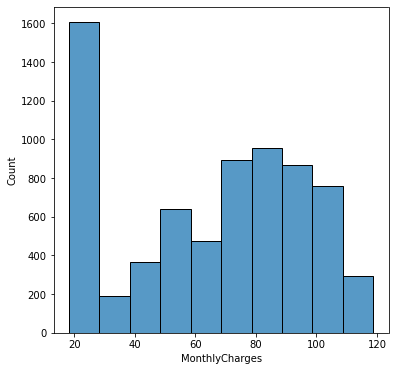

In [13]:
#histogram for observing distribution of 
sns.histplot(df['MonthlyCharges'], bins=10)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

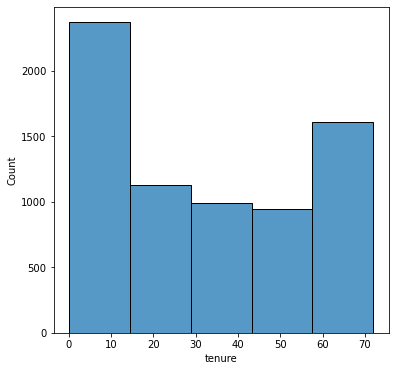

In [14]:
#histogram for observing distribution of tenures
sns.histplot(df['tenure'], bins=5)

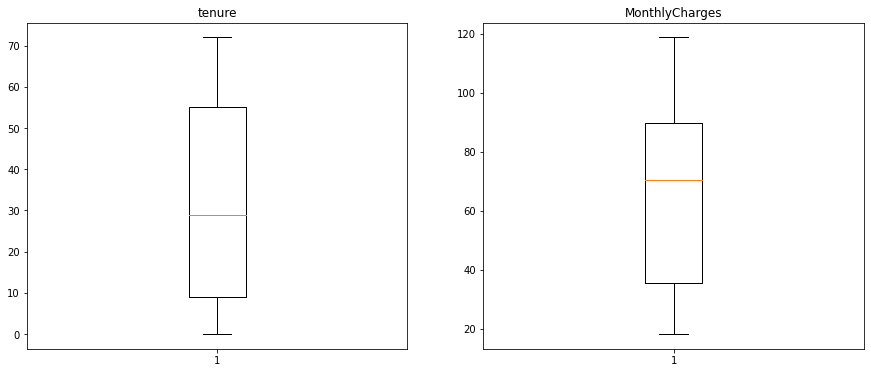

In [15]:
#check outliers using boxplot
numeric_col = ['tenure', 'MonthlyCharges']
fig1, ax1 = plt.subplots(1,2, figsize=(15, 6))

for i, col in enumerate(numeric_col):
    ax1[i].boxplot(df[col]) 
    ax1[i].set_title(col)
    
#tenure is positively skewed as mean is greater than median

#MonthlyCharges is negatively skewed as mean is lower than median

C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Churn Counts for females and males'}, xlabel='gender', ylabel='count'>

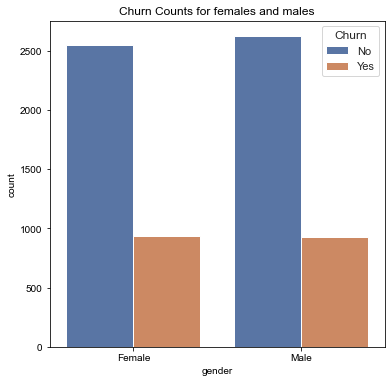

In [16]:
plt.figure(figsize = (6,6))
plt.title('Churn Counts for females and males')
sns.set(style = 'whitegrid')
sns.countplot(df.gender, hue = df.Churn)

In [17]:
### replace string values with numerical categorical values
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [18]:
## lets look at the churn rates according to their genders to see if there is any differences btw genders
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn Counts for Senior Citizens and Others')

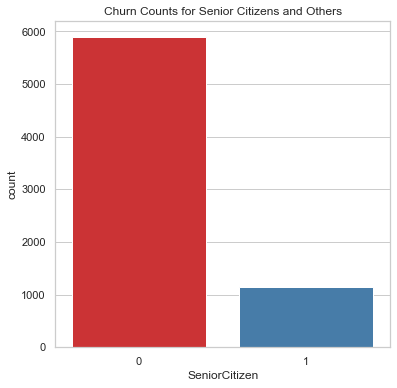

In [19]:
sns.countplot(df['SeniorCitizen'], palette = "Set1")
plt.title('Churn Counts for Senior Citizens and Others')

In [20]:
## lets look at the churn rates between senior citizens and others to see if there is any differences btw them.
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [21]:
## similarly check other binary features in terms of churn rates.
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [22]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [23]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [25]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


<AxesSubplot:>

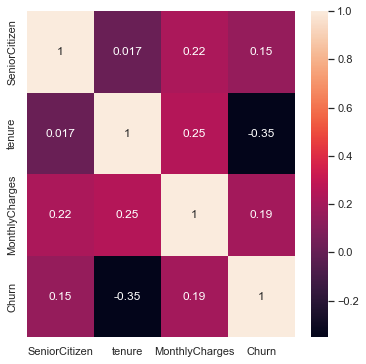

In [26]:
count = []
for col in df:
    if df[col].dtype != 'object':
        count.append(col)
count
sns.heatmap(df[count].corr(), annot=True)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [88]:
## Multiple features exploratory data analysis

C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

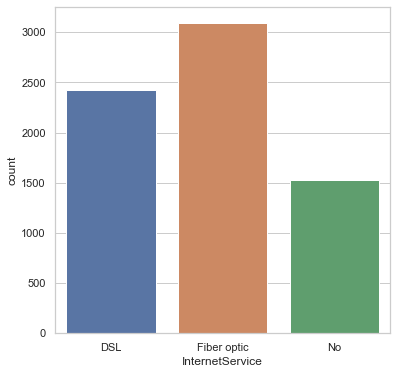

In [28]:
sns.countplot("InternetService", data=df)

In [29]:
#This company may have some problems with fiber optic connection.
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [30]:
#Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\utku.so

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

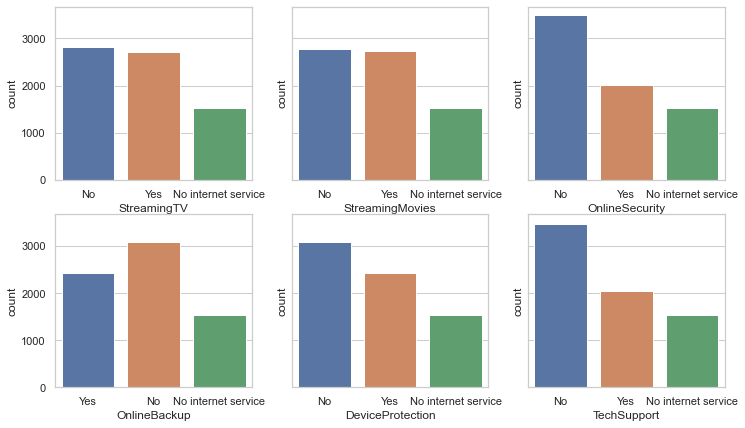

In [31]:
#We can now check the distributions of internet service related variables:
fig2, axes2 = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes2[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes2[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes2[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes2[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes2[1,1])
sns.countplot("TechSupport", data=df, ax=axes2[1,2])

C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utku.sokat\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

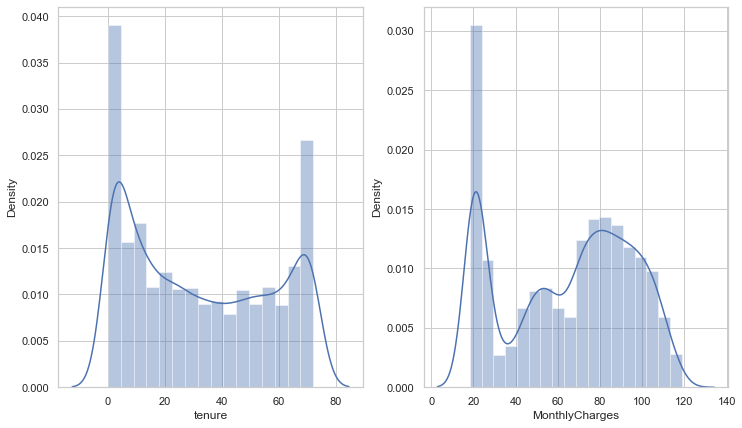

In [137]:
## lets see the distribution of tenure and monthlycharges
fig3, axes3 = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes3[0])
sns.distplot(df["MonthlyCharges"], ax=axes3[1])

#3 it can be said that most of the customers are either new or slightly old.

In [32]:
# After exploring the variables, I have decided not to use following variables because they add little or no informative power to the model:

## CustomerID Gender PhoneService Contract TotalCharges

df.drop(["customerID","gender","PhoneService","Contract","TotalCharges"], axis=1, inplace=True)


In [33]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [ ]:
## DATA PREPROCESSING

In [ ]:
#Categorical features need to be converted to numbers 
#so that they can be included in calculations done by a machine learning model.

In [ ]:
#When we encode the categorical variables, a number will be assigned to each category. 

In [ ]:
#The category with higher numbers will be considered more important or effect the model more.

In [ ]:
#We also need to scale continuous variables.

In [ ]:
#Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [37]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [ ]:
#Encoding categorical variables:

In [40]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
scaled_data = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [41]:
scaled_data.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
#Scaling continuous variables:

In [43]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [44]:
scaled_data['tenure'] = a
scaled_data['MonthlyCharges'] = b

In [46]:
#Let’s check the new dimension of the dataset:
scaled_data.shape

(7043, 26)

In [47]:
scaled_data.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
### Model Creation and Evaluation

In [60]:
from sklearn.model_selection import train_test_split
#https://medium.com/@gulcanogundur/do%C4%9Fruluk-accuracy-kesinlik-precision-duyarl%C4%B1l%C4%B1k-recall-ya-da-f1-score-300c925feb38
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [50]:
x = scaled_data.drop(['Churn'], axis=1) #features (independent variables)
y = scaled_data['Churn'] #target (dependent variable)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [52]:
### Logistic Regression Model

In [89]:
# Running logistic regression model 
#creating a logistic regression model and training it.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
regression_model = model.fit(x_train, y_train)

In [90]:
#Making predictions on training set and evaluating
pred = regression_model.predict(x_train)
train_regression_accuracy = accuracy_score(y_train, pred)*100
print("logistic regression train accuracy = {}%".format(train_regression_accuracy))

logistic regression train accuracy = 80.36511156186612%


In [138]:
#Making predictions on test set and evaluating:
pred_test_regression = regression_model.predict(x_test)
test_regression_accuracy = accuracy_score(y_test, pred_test_regression)*100
print("logistic regression test accuracy = {}%".format(test_regression_accuracy))

logistic regression test accuracy = 80.8329389493611%


In [139]:
print(classification_report(y_test, pred_test_regression))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



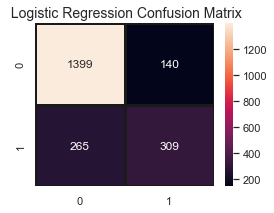

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_test_regression),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
#The model achieved 80% accuracy on training set and 80% accuracy on test set.
#The model is not overfitting because accuracies on training and test sets are similar to each other. 
#we will try different ML models to increase its accuracy.

In [ ]:
## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
#Making predictions on training set and evaluating
pred_train_knn = knn_model.predict(x_train)
train_knn_accuracy = accuracy_score(y_train, pred_train_knn)*100
print("knn train accuracy = {}%".format(train_knn_accuracy))

knn train accuracy = 85.84178498985801%


In [100]:
#Making predictions on test set and evaluating:
pred_test_knn = knn_model.predict(x_test)
test_knn_accuracy = accuracy_score(y_test, pred_test_knn)*100
print("knn test accuracy = {}%".format(test_knn_accuracy))

knn test accuracy = 74.49124467581638%


In [101]:
print(classification_report(y_test, pred_test_knn))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1539
           1       0.53      0.48      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113



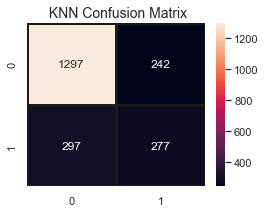

In [142]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_test_knn),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" KNN Confusion Matrix",fontsize=14)
plt.show()

In [97]:
#The model achieved 85% accuracy on training set and 75% accuracy on test set.
#there might be overfitting because the training and test sets are not similar to each other.
#we will try different ML models to increase its accuracy.

In [102]:
## Support Vector Classifier SVC

In [106]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 2)
svc_model.fit(x_train,y_train)

SVC(random_state=2)

In [107]:
#Making predictions on training set and evaluating
pred_train_svc = svc_model.predict(x_train)
train_svc_accuracy = accuracy_score(y_train, pred_train_svc)*100
print("svc train accuracy = {}%".format(train_svc_accuracy))

svc train accuracy = 81.35902636916835%


In [108]:
#Making predictions on test set and evaluating:
pred_test_svc = svc_model.predict(x_test)
test_svc_accuracy = accuracy_score(y_test, pred_test_svc)*100
print("svc test accuracy = {}%".format(test_svc_accuracy))

svc test accuracy = 79.79176526265974%


In [109]:
print(classification_report(y_test, pred_test_svc))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.69      0.46      0.55       574

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



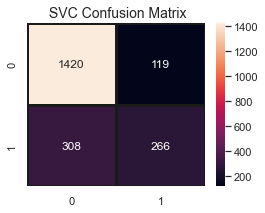

In [144]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_test_svc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" SVC Confusion Matrix",fontsize=14)
plt.show()

In [110]:
#The model achieved 81% accuracy on training set and 79% accuracy on test set.
#The model is not overfitting because accuracies on training and test sets are similar to each other. 
#we will try different ML models to increase its accuracy.

In [131]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=50)
forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=50)

In [ ]:
#n_estimators: The number of trees in the forest.
#max_depth: The maximum depth of the tree

In [132]:
#Making predictions on training set and evaluating
pred_train_forest = forest_model.predict(x_train)
train_forest_accuracy = accuracy_score(y_train, pred_train_forest)*100
print("random forest train accuracy = {}%".format(train_forest_accuracy))

random forest train accuracy = 87.34279918864097%


In [133]:
#Making predictions on test set and evaluating:
pred_test_forest = forest_model.predict(x_test)
test_forest_accuracy = accuracy_score(y_test, pred_test_forest)*100
print("random forest test accuracy = {}%".format(test_forest_accuracy))

random forest test accuracy = 80.12304779933743%


In [129]:
print(classification_report(y_test, pred_test_forest))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



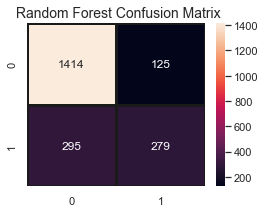

In [134]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_test_forest),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Random Forest Confusion Matrix",fontsize=14)
plt.show()

In [148]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

forest = RandomForestClassifier()
forest_grid = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [156]:
forest_grid.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [157]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 15, 'n_estimators': 250}, 0.7897212118523775)

In [158]:
## RANDOM FOREST GRİD MODEL RESULTS

In [159]:
forest_grid_model = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=50)
forest_grid_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=50)

In [161]:
#Making predictions on training set and evaluating
pred_train_forest_grid = forest_grid_model.predict(x_train)
train_forest_grid_accuracy = accuracy_score(y_train, pred_train_forest_grid)*100
print("random forest with grid search train accuracy = {}%".format(train_forest_grid_accuracy))

random forest with grid search train accuracy = 98.92494929006085%


In [165]:
#Making predictions on test set and evaluating:
pred_test_forest_grid = forest_grid_model.predict(x_test)
test_forest_grid_accuracy = accuracy_score(y_test, pred_test_forest_grid)*100
print("random forest test accuracy = {}%".format(test_forest_grid_accuracy))

random forest test accuracy = 79.36583057264552%


In [166]:
print(classification_report(y_test, pred_test_forest_grid))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1539
           1       0.65      0.51      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



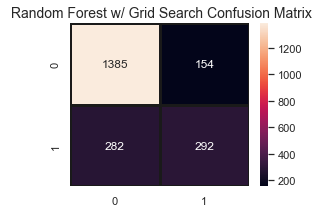

In [167]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred_test_forest_grid),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Random Forest w/ Grid Search Confusion Matrix",fontsize=14)
plt.show()